In [5]:
import chess
import chess.pgn
import chess.svg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import numpy as np

In [2]:
def heatmap_from_board(board):
    control_map = [0 for _ in range(64)]

    for sq in range(63):
        white_attacks = len(list(board.attackers(True, sq)))
        black_attacks = len(list(board.attackers(False, sq)))
        control_map[sq] = white_attacks - black_attacks
        
    heatmap = np.flip(np.array(control_map).reshape((8,8)), axis=0)
    return heatmap

In [3]:
def heatmap_from_game(pgn_filepath):
    game_heatmap = []
    board_history = []

    with open(pgn_filepath) as pgn:
        game = chess.pgn.read_game(pgn)

        b = game.board()
        h = heatmap_from_board(b)
        
        game_heatmap.append(h)
        board_history.append(b.copy())

        for move in game.mainline_moves():
            b.push(move)
            h = heatmap_from_board(b)
            
            game_heatmap.append(h)
            board_history.append(b.copy())
            
    return game_heatmap, board_history

In [4]:
cmap = sns.diverging_palette(160, 300, as_cmap=True)

In [52]:
heatmaps, boards = heatmap_from_game("testgame.pgn")

In [55]:
def animate_frame(_min, _max, game_history):
    def func(i):
        frame = plt.imshow(
            game_history[i], cmap=cmap, vmin=_min, vmax=_max)
        return frame
    return func
        
def animate_history(heatmaps, path, title=""):
    _max = np.max(heatmaps)
    _min = np.min(heatmaps)
        
    Writer = animation.writers["ffmpeg"]
    writer = Writer(fps=1.2, bitrate=1200)
        
    fig = plt.figure(figsize=(10,6))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
        
    ani = animation.FuncAnimation(fig, animate_frame(_min, _max, heatmaps), frames=len(heatmaps))
    ani.save(path, writer=writer)

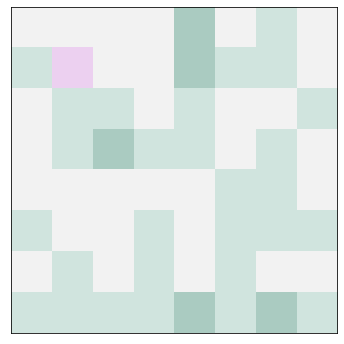

In [56]:
animate_history(heatmaps, "testgame.mp4")